#Home Work - 3  


## Problem 1: Network Compression Using SVD [2 points]

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
#import mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalizing the pixels
x_train=x_train.reshape(-1,784)/255.0
x_test=x_test.reshape(-1,784)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [ ]:
#creating  baseline architecuure
model_baseline=models.Sequential()
model_baseline.add(layers.Dense(1024,activation='relu',input_shape=(784,)))
model_baseline.add(layers.Dense(1024,activation='relu'))
model_baseline.add(layers.Dense(1024,activation='relu'))
model_baseline.add(layers.Dense(1024,activation='relu'))
model_baseline.add(layers.Dense(1024,activation='relu'))
model_baseline.add(layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_baseline.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,012,490 (19.12 MB)

 Trainable params: 5,012,490 (19.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_baseline.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_baseline.fit(x_train,y_train,epochs=50,batch_size=64,validation_data=(x_test,y_test))
model_baseline.save('model_baseline.h5')

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8840 - loss: 0.3792 - val_accuracy: 0.9671 - val_loss: 0.1176
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9679 - loss: 0.1134 - val_accuracy: 0.9743 - val_loss: 0.0955
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9787 - loss: 0.0812 - val_accuracy: 0.9718 - val_loss: 0.1168
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9825 - loss: 0.0647 - val_accuracy: 0.9700 - val_loss: 0.1135
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9839 - loss: 0.0607 - val_accuracy: 0.9771 - val_loss: 0.1084
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9875 - loss: 0.0472 - val_accuracy: 0.9791 - val_loss: 0.0961
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9905 - loss: 0.0340 - val_accuracy: 0.9802 - val_loss: 0.0886
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9911 - loss: 0.0323 - val_accuracy: 

In [ ]:
model_baseline.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9811 - loss: 0.2262


[0.17497645318508148, 0.984499990940094]

In [ ]:
models_list=[]
baseline_weights = [layer.get_weights() for layer in model_baseline.layers]
svd_weights = [tf.linalg.svd(w[0]) for w in baseline_weights[:-1]]

In [ ]:
D_values=[10,20,50,100,200,"full"]
for D in D_values:
  svd_model = tf.keras.models.load_model('model_baseline.h5')
  if D=="full":
    for i, weights in enumerate(baseline_weights[:-1]):
      s,u,v=svd_weights[i]
      new_weights = tf.matmul(u, tf.matmul(tf.linalg.diag(s), v, adjoint_b=True))
      svd_model.layers[i].set_weights([new_weights, weights[1]])
  if D!='full':
    for i, weights in enumerate(baseline_weights[:-1]):
      s,u,v=svd_weights[i]
      u = u[:, :D]
      s = s[:D]
      v = v[:, :D]
      new_weights = tf.matmul(u, tf.matmul(tf.linalg.diag(s), v, adjoint_b=True))
      svd_model.layers[i].set_weights([new_weights, weights[1]])
  models_list.append(svd_model)

In [ ]:
values=[]
for i in models_list:
   k=i.evaluate(x_test,y_test)
   values.append(k[1]*100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0968 - loss: 2.4224
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2953 - loss: 1.8411
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8012 - loss: 0.6914
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9744 - loss: 0.1332
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9795 - loss: 0.1618
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9811 - loss: 0.2262


In [ ]:

for i in range(len(values)):
  print("Value:",D_values[i]," | Accuracy :",values[i])

Value: 10  | Accuracy : 10.019999742507935
Value: 20  | Accuracy : 31.209999322891235
Value: 50  | Accuracy : 81.20999932289124
Value: 100  | Accuracy : 97.87999987602234
Value: 200  | Accuracy : 98.22999835014343
Value: full  | Accuracy : 98.4499990940094


Text(0, 0.5, 'D_value')

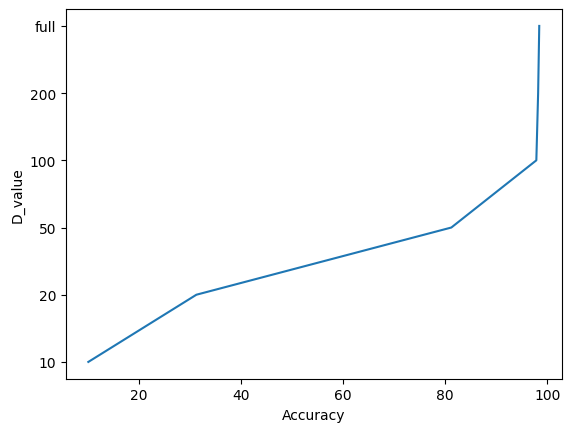

In [ ]:
import matplotlib.pyplot as plt
plt.plot(values,D_values)
plt.xlabel("Accuracy")
plt.ylabel("D_value")

## Problem 2: Network Compression Using SVD [2 points]

In [ ]:
#loading the model 20 from the previous list
svd_model_20=models_list[1]
svd_model.save('model_20.h5')

In [ ]:
def generate_fact_model(D_value):
  model_20D= tf.keras.models.Sequential()
  model_20D.add((tf.keras.layers.Input(shape=(784,))))
  svd_model_20_weights = [layer.get_weights() for layer in svd_model_20.layers]
  svd_conv_weights = [tf.linalg.svd(w[0]) for w in svd_model_20_weights[:-1]]
  for i, weights in enumerate(svd_model_20_weights[:-1]):
    s,u,v=svd_conv_weights[i]
    u_=u
    v_= tf.matmul(tf.linalg.diag(s), v, adjoint_b=True)
    layer_weights = tf.matmul(u_,v_)
    dense_layer = tf.keras.layers.Dense(1024)
    model_20D.add(dense_layer)
    dense_layer.set_weights([layer_weights, weights[1]])

  model_20D.add(tf.keras.layers.Dense(10,activation='softmax'))
  return model_20D


In [ ]:
model_20D=generate_fact_model(20)
model_20D.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_20D.fit(x_train,y_train,epochs=50,batch_size=64,validation_data=(x_test,y_test))
model_20D.save('model_20D_updated.h5')

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7573 - loss: 7820.1704 - val_accuracy: 0.8284 - val_loss: 223.3703
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8529 - loss: 124.8829 - val_accuracy: 0.8657 - val_loss: 50.8751
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8621 - loss: 38.8679 - val_accuracy: 0.8598 - val_loss: 19.2548
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8575 - loss: 16.1808 - val_accuracy: 0.8354 - val_loss: 11.5000
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8434 - loss: 15.8846 - val_accuracy: 0.8540 - val_loss: 21.3812
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8366 - loss: 54.5235 - val_accuracy: 0.8572 - val_loss: 8.4881
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8628 - loss: 8.0639 - val_accuracy: 0.8747 - val_loss: 8.3336
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8388 - loss: 21.8807 

In [ ]:
k=model_20D.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8949 - loss: 0.3675


In [ ]:
print("Accuracy of Model_20D :",k[1]*100)

Accuracy of Model_20D : 91.10000133514404


we got the test accuracy of 91.1% which is a very good improvement from the 32% accruacy before the factorization.

## Problem 3: Network Compression Using SVD [3 points]

In [ ]:
svd_model_epochwise=tf.keras.models.Sequential()
svd_model_epochwise.add(tf.keras.layers.Input(shape=(784,)))
svd_model_epochwise.add(tf.keras.layers.Dense(1024,activation='relu'))
svd_model_epochwise.add(tf.keras.layers.Dense(1024,activation='relu'))
svd_model_epochwise.add(tf.keras.layers.Dense(1024,activation='relu'))
svd_model_epochwise.add(tf.keras.layers.Dense(1024,activation='relu'))
svd_model_epochwise.add(tf.keras.layers.Dense(1024,activation='relu'))
svd_model_epochwise.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
baseline_weights = tf.keras.models.load_model('model_baseline.h5').get_weights()
svd_model_epochwise.set_weights(baseline_weights)
svd_model_epochwise.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 20
batch_size = 1024

for epoch in range(epochs):
  print(f'Epoch {epoch + 1}/{epochs}')
  for i in range(0, x_train.shape[0], batch_size):
    x_batch = x_train[i:i + batch_size]
    y_batch = y_train[i:i + batch_size]

    for layer in svd_model_epochwise.layers[:-1]:
      weights = layer.get_weights()
      s, u, v = tf.linalg.svd(weights[0])
      u = u[:, :20]
      s = s[:20]
      v = v[:, :20]
      weights[0] = tf.matmul(u, tf.matmul(tf.linalg.diag(s), v, adjoint_b=True))
      layer.set_weights(weights)

    batch_loss, batch_accuracy = svd_model_epochwise.train_on_batch(x_batch, y_batch)
  loss, accuracy = svd_model_epochwise.evaluate(x_test, y_test)

Epoch 1/20


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9565 - loss: 0.2202
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9673 - loss: 0.1614
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9700 - loss: 0.1387
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9729 - loss: 0.1336
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9735 - loss: 0.1277
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9744 - loss: 0.1414
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9752 - loss: 0.1426
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9746 - loss: 0.1506
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9744 - loss: 0.1434
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9762 - loss: 0.1468
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9756 - loss: 0.1868
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

In [ ]:
svd_model_epochwise.save('model_epochwise.h5')

In [ ]:
test_loss, test_accuracy = svd_model_epochwise.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9744 - loss: 0.2080
Test accuracy: 97.82%


The accuracy is very close to 97% and it is almost same as the base line accuracy.